<a href="https://colab.research.google.com/github/Dabaiee/CS5100group7/blob/yw/OtherModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# pip install keras 
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense, LSTM

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Load the data

# Validate the data frame
# To validate the data frame is empty or not

In [4]:
def read_url(url):
    df = pd.read_csv(url)
    if(df.empty):
        print ('url file is empty')
    else:
        print ('url file is not empty')
        return df

In [5]:
#1st approach get data from our github
url = 'https://raw.githubusercontent.com/Dabaiee/CS5100group7/main/datasets/ETH-USD.csv'
df = pd.read_csv(url)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...,...
1828,2022-11-11,1298.882446,1302.295288,1211.329590,1287.221069,1287.221069,20920539099
1829,2022-11-12,1287.438354,1288.150879,1242.152222,1255.268311,1255.268311,10964962767
1830,2022-11-13,1255.441284,1271.712524,1208.520996,1221.819214,1221.819214,10717455214
1831,2022-11-14,1221.895508,1284.217651,1178.429077,1241.604248,1241.604248,15028035663


In [6]:
read_url(url)

url file is not empty


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...,...
1828,2022-11-11,1298.882446,1302.295288,1211.329590,1287.221069,1287.221069,20920539099
1829,2022-11-12,1287.438354,1288.150879,1242.152222,1255.268311,1255.268311,10964962767
1830,2022-11-13,1255.441284,1271.712524,1208.520996,1221.819214,1221.819214,10717455214
1831,2022-11-14,1221.895508,1284.217651,1178.429077,1241.604248,1241.604248,15028035663


#data types

In [7]:
print(df.dtypes)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


#validate data to check missing values

In [8]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [9]:
for col in df.columns:
    miss = df[col].isnull().sum()
    if miss>0:
        print("{} has {} missing value(s)".format(col,miss))
    else:
        print("{} has NO missing value!".format(col))

Date has NO missing value!
Open has NO missing value!
High has NO missing value!
Low has NO missing value!
Close has NO missing value!
Adj Close has NO missing value!
Volume has NO missing value!


In [10]:
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_datetime(df[col])
        except ValueError:
            pass
print(df.dtypes)

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object


In [11]:
df['Close'].describe()

count    1833.000000
mean     1127.568915
std      1202.639823
min        84.308296
25%       209.703995
50%       474.626434
75%      1799.166260
max      4812.087402
Name: Close, dtype: float64

In [12]:
# !pip install --upgrade pandas-datareader

# !pip install --upgrade pandas

In [13]:
#2nd apprroach to get data
#get data from yahoo
# current = dt.datetime.now()
# df = web.DataReader('ETH-USD', data_source='yahoo', start='2016-01-01', end=current)
# df

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1833 entries, 0 to 1832
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1833 non-null   datetime64[ns]
 1   Open       1833 non-null   float64       
 2   High       1833 non-null   float64       
 3   Low        1833 non-null   float64       
 4   Close      1833 non-null   float64       
 5   Adj Close  1833 non-null   float64       
 6   Volume     1833 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 100.4 KB


In [15]:
df.shape

(1833, 7)

# Visualization

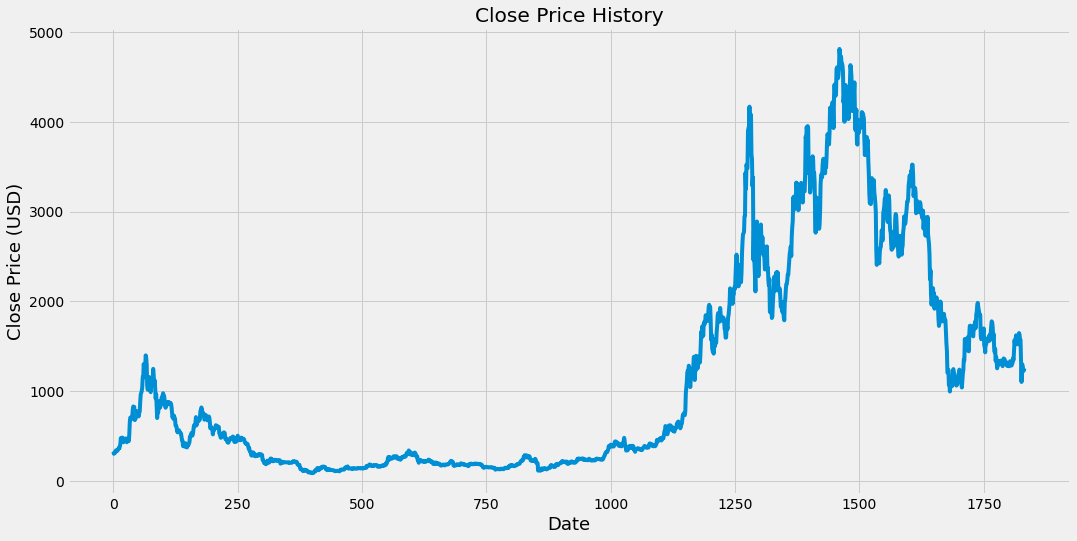

In [16]:
#visualize the closing price
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price (USD)', fontsize = 18)
plt.show()

In [15]:
move_average_100 = df.Close.rolling(100).mean()
move_average_100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
1828    1507.766302
1829    1504.236928
1830    1499.132573
1831    1494.632035
1832    1490.171121
Name: Close, Length: 1833, dtype: float64

In [16]:
move_average_200 = df.Close.rolling(200).mean()
move_average_200

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
1828    1606.376496
1829    1598.611346
1830    1590.275794
1831    1581.799110
1832    1573.987398
Name: Close, Length: 1833, dtype: float64

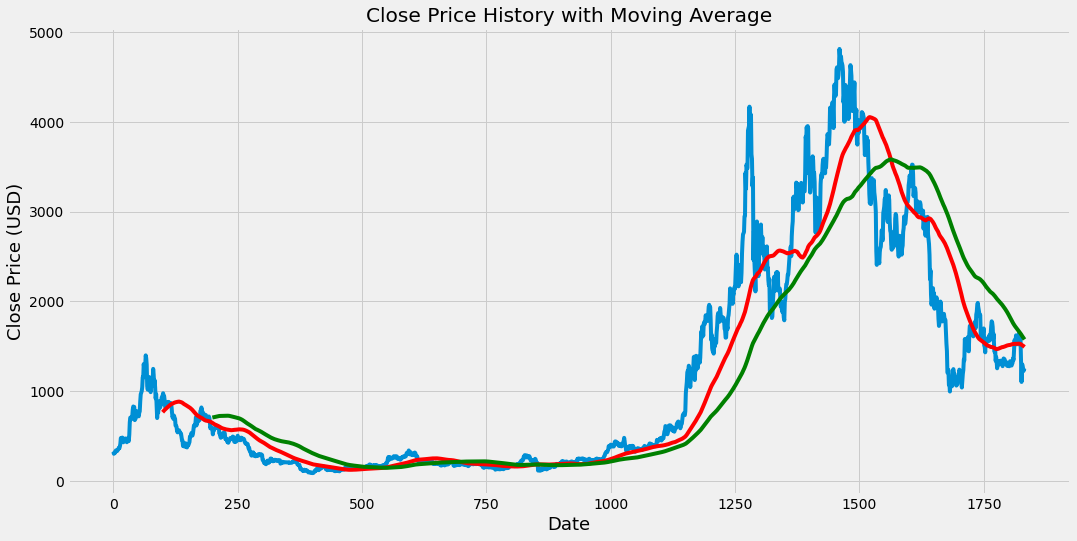

In [17]:
plt.figure(figsize=(16,8))
plt.title('Close Price History with Moving Average')
plt.plot(df['Close'])
plt.plot(move_average_100, 'r')
plt.plot(move_average_200, 'g')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price (USD)', fontsize = 18)
plt.show()


# Moving average

In [32]:
df.columns
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'], copy=True)
for i in range(0,len(df)):

  new_data['Date'][i] = df['Date'][i]

  new_data['Close'][i] = df['Close'][i]

print(len(df))
training_data_len = math.ceil(len(df) * 0.8)
train = new_data[:training_data_len].copy()

valid = new_data[training_data_len:].copy()


print(new_data.shape)
print(train.shape)
print(valid.shape)


train['Date'].min(), train['Date'].max(), valid['Date'].min(), valid['Date'].max()

1833
(1833, 2)
(1467, 2)
(366, 2)


(Timestamp('2017-11-09 00:00:00'),
 Timestamp('2021-11-14 00:00:00'),
 Timestamp('2021-11-15 00:00:00'),
 Timestamp('2022-11-15 00:00:00'))

In [33]:
#make predictions

preds = []

for i in range(0,len(valid)):

  a = train['Close'][len(train)-len(valid)+i:].sum() + sum(preds)

  b = a/len(valid)

  preds.append(b)


1229.0027974598738


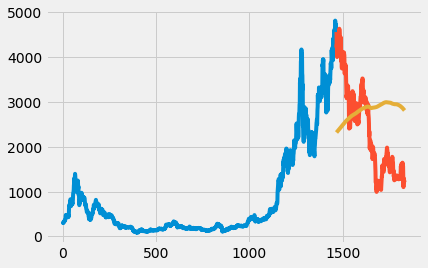

In [34]:
#calculate rmse

rmse=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))

print(rmse)

#plot


valid.loc[:,'Predictions'] = preds
plt.plot(train['Close'])

plt.plot(valid[['Close', 'Predictions']])

# Linear Regression

In [35]:
df.columns
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'], copy = True)
for i in range(0,len(df)):

  new_data['Date'][i] = df['Date'][i]

  new_data['Close'][i] = df['Close'][i]


In [36]:
#create features

from fastai.tabular.all import add_datepart

add_datepart(new_data, 'Date')

new_data.drop('Elapsed', axis=1, inplace=True) #elapsed will be the time stamp

new_data['mon_fri'] = 0

for i in range(0,len(new_data)):

  if(new_data['Dayofweek'][i] == 0 or new_data['Dayofweek'][i] == 4):
    new_data.loc[i, 'mon_fri'] = 1

  else:
    new_data.loc[i, 'mon_fri'] = 0



In [37]:
#split into train and validation
training_data_len = math.ceil(len(new_data) * 0.8)
train = new_data[:training_data_len].copy()

valid = new_data[training_data_len:].copy()
print(valid.columns)
x_train = train.drop('Close', axis=1)

y_train = train['Close']

x_valid = valid.drop('Close', axis=1)

y_valid = valid['Close']

#implement linear regression

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train,y_train)

Index(['Close', 'Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
       'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start',
       'Is_year_end', 'Is_year_start', 'mon_fri'],
      dtype='object')


LinearRegression()

In [38]:
#make predictions and find the rmse

preds = model.predict(x_valid)

rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

1224.3715023168015

Index(['Close', 'Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
       'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start',
       'Is_year_end', 'Is_year_start', 'mon_fri', 'Predictions'],
      dtype='object')


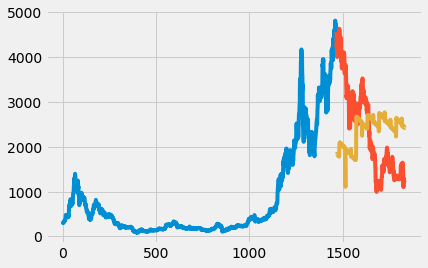

In [41]:
#plot



valid['Predictions'] = preds

valid.index = new_data[training_data_len:].index

train.index = new_data[:training_data_len].index

plt.plot(train['Close'])
print(valid.columns)
plt.plot(valid[['Close','Predictions']])

# KNN

In [42]:
#importing libraries

from sklearn import neighbors

from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))


#scaling data

x_train_scaled = scaler.fit_transform(x_train)

x_train = pd.DataFrame(x_train_scaled)

x_valid_scaled = scaler.fit_transform(x_valid)

x_valid = pd.DataFrame(x_valid_scaled)

#using gridsearch to find the best parameter

params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()



model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions

model.fit(x_train,y_train)

preds = model.predict(x_valid)


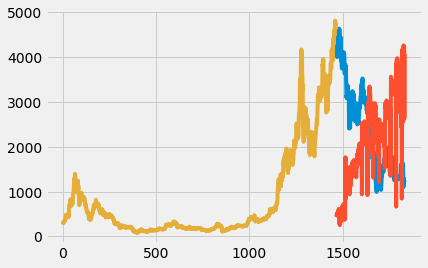

In [43]:
#rmse

rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))

rms

#plot

valid['Predictions'] = 0

valid['Predictions'] = preds

plt.plot(valid[['Close', 'Predictions']])

plt.plot(train['Close'])


# ARIMA

In [1]:
%pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 7.3 MB/s 
     |████████████████████████████████| 9.9 MB 17.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [17]:
from pmdarima.arima import auto_arima
df.columns
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'], copy = True)
for i in range(0,len(df)):

  new_data['Date'][i] = df['Date'][i]

  new_data['Close'][i] = df['Close'][i]

training_data_len = math.ceil(len(df) * 0.8)

train = new_data[:training_data_len].copy()

valid = new_data[training_data_len:].copy()

training = train['Close']

validation = valid['Close']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)

model.fit(training)





Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=8.21 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=17672.015, Time=0.18 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=17158.565, Time=1.79 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=5.58 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=17655.590, Time=0.23 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=16974.046, Time=4.40 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=15.07 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=6.25 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=16989.725, Time=2.59 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=16972.728, Time=3.70 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=17159.012, Time=1.61 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=15.41 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=5.78 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=16974.686, Time=3.64 sec
 ARIMA(2,1,1)(2,1,0)[12]             : 

7541.601591086026


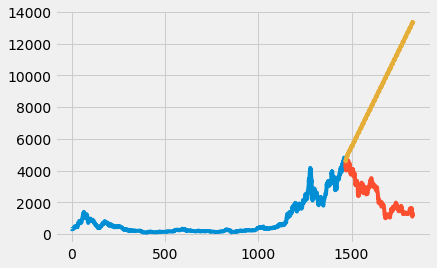

In [25]:
forecast = model.predict(n_periods=len(valid))

forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Prediction'])),2)))

print(rms)
#plot
plt.plot(train['Close'])

plt.plot(valid['Close'])

plt.plot(forecast['Prediction'])


# Prophet

In [27]:
import io, os, sys, setuptools, tokenize

In [30]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62.6 MB 131 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6751459 sha256=986deafd303a3524b04d04453eac3f7cdeb4c49cc52f72ced5e73ef7f5fd26b1
  Stored in directory: /root/.cache/pip/wheels/d0/d2/ae/c579b7fd160999d35908f3cb8ebcad7ef64ecaca7b78e4c3c8
Successfully built fbprophet


In [32]:
#importing prophet

from fbprophet import Prophet

#creating dataframe

new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'], copy = True)
for i in range(0,len(df)):

  new_data['Date'][i] = df['Date'][i]

  new_data['Close'][i] = df['Close'][i]


new_data['Date'] = pd.to_datetime(new_data.Date,format='%Y-%m-%d')

new_data.index = new_data['Date']

#preparing data

new_data.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)

#train and validation

training_data_len = math.ceil(len(df) * 0.8)

train = new_data[:training_data_len].copy()

valid = new_data[training_data_len:].copy()

#fit the model

model = Prophet(daily_seasonality=True)

model.fit(train)

#predictions

close_prices = model.make_future_dataframe(periods=len(valid))

forecast = model.predict(close_prices)



3986.5056988523475


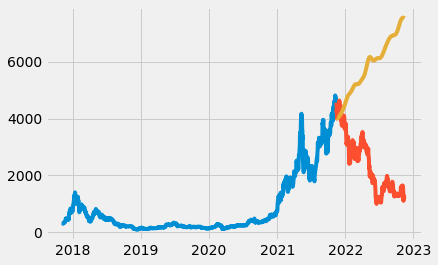

In [35]:
#rmse

forecast_valid = forecast['yhat'][training_data_len:]

rms=np.sqrt(np.mean(np.power((np.array(valid['y'])-np.array(forecast_valid)),2)))


print(rms)

#plot

valid['Predictions'] = 0

valid['Predictions'] = forecast_valid.values

plt.plot(train['y'])

plt.plot(valid[['y', 'Predictions']])


In [ ]:
#create a new dataframe with 'Close' column
data = df.filter(['Close'])
#convert the dataframe into an array
dataset = data.values
#count number of data to train the model
training_data_len = math.ceil(len(dataset) * 0.8)
training_data_len


1467

In [ ]:
#Scale the data - it is advantage to pre processing the scaling to input data before neural network
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.0500395 ],
       [0.0454642 ],
       [0.04872747],
       ...,
       [0.24060154],
       [0.24478638],
       [0.24725163]])

In [ ]:
#create the training data set
#create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
train_data
#split the data into x_train and y_train data sets
#x_train is train feature
x_train = []
#y_train is target var
y_train = []

#we use past continuously 60 days of x to predict the 61st day of y, 
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  # if i <= 61:
  #   print('x',x_train)
  #   print('y',y_train)
  #   print('.............')

In [ ]:
#convert the x_train and y_train to an array
x_train = np.array(x_train)
y_train = np.array(y_train)

In [ ]:
#we start at index 59 -> 60th of x
x_train.shape
# print(x_train[0])

(1407, 60)

In [ ]:
#LSTM need input to be 3-D (num of samples, num of time steps, num of features) 
#therefore, need to reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(1407, 60, 1)

In [ ]:
from keras.engine import input_layer
#build the LSTM model (continuously dataset)
#LSTM is one of the recurrent neural network
model = Sequential()
#use 50 neurons
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#compile the model
#optimizer is used to improve the loss function (adaptive moment)
#loss function measure the accurate of model on training
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#train the model
#batch size is the total number of training examples present in a single batch
#epochs is the iterations when an entire dataset is passed forward and backward thru a neural netwok
model.fit(x_train, y_train, batch_size=1, epochs=1)

1407/1407 [==============================] - 43s 28ms/step - loss: 0.0027


In [ ]:
#create the testing data set
#create an new array ontained rest of scaled value (0,1)
test_data = scaled_data[training_data_len - 60:, :]
#create the data set x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

#idea here is we use rest of scaled data （scaled_data * 20%)
#start from index 60 of test_data, in group of 60, and we put 60 numbers into x_test

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
print(len(x_test))
y_test.shape

366


(366, 1)

In [ ]:
#convert the data to a numpy array
x_test = np.array(x_test)
x_test

array([[0.73755278, 0.70101213, 0.70809358, ..., 0.9693361 , 0.96602486,
        0.96071548],
       [0.70101213, 0.70809358, 0.68639833, ..., 0.96602486, 0.96071548,
        0.94615157],
       [0.70809358, 0.68639833, 0.60804133, ..., 0.96071548, 0.94615157,
        0.87399535],
       ...,
       [0.32794398, 0.29345389, 0.2851528 , ..., 0.25702476, 0.25443506,
        0.24767655],
       [0.29345389, 0.2851528 , 0.29304106, ..., 0.25443506, 0.24767655,
        0.24060154],
       [0.2851528 , 0.29304106, 0.26461067, ..., 0.24767655, 0.24060154,
        0.24478638]])

In [ ]:
#reshape the data x_test to 3-D for LSTM
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#get the model predicted price values
#use the model with x_test values to get the predicted y
predictions = model.predict(x_test)
#unscalling the values, use inverse the scaled value to noraml value
#we want predictions contain the same values as y_test data set
predictions = scaler.inverse_transform(predictions)

12/12 [==============================] - 1s 15ms/step


# ML Model(s) Testing validation metrics


## MSE and RMSE

In [ ]:
#evaluate the model preform
#get the root mean squares error(RMSE)
#RMSE is measure of how accurate the model predicts
#RMSE is the standard deviation of the residuals

#predictions: get from model with x_test
#y_test: the actural value from data set
mse = np.mean(predictions - y_test)** 2
print("MSE : " + str(mse))
rmse = np.sqrt(mse)
print("RMSE : ", rmse)

MSE : 71.02852569968161
RMSE :  8.42784229205089


# Mean Absolute Error (MAE)

In [ ]:
# Mean Absolute Error calculates the average difference between the calculated values and actual values. It is also known as scale-dependent accuracy as it calculates error in observations taken on the same scale. It is used as evaluation metrics for regression models in machine learning. It calculates errors between actual values and values predicted by the model.
# It is used to predict the accuracy of the machine learning model.
# calculate MAE
mean_absolute_error = mae(y_test, predictions)
  
# display
print("Mean absolute error : " , mean_absolute_error)

Mean absolute error :  137.93149802288252


# R square

In [ ]:
#It is the amount of the variation in the output dependent attribute which is predictable from the input independent variable(s).
# Perfect model : 1
# It shows that our model predicts the change in stock prices pretty well
r_square = r2_score(y_test, predictions)
print('r2 score is', r_square)

r2 score is 0.9673899155445957


            Close  Predictions
1467  4557.503906  4607.955566
1468  4216.365234  4592.126465
1469  4287.593750  4531.064941
1470  4000.650879  4466.459473
1471  4298.306641  4371.958984
...           ...          ...
1828  1287.221069  1372.189453
1829  1255.268311  1326.646729
1830  1221.819214  1287.659912
1831  1241.604248  1252.803345
1832  1253.259399  1226.203857

[366 rows x 2 columns]


<ipython-input-38-ccb7842af5e8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


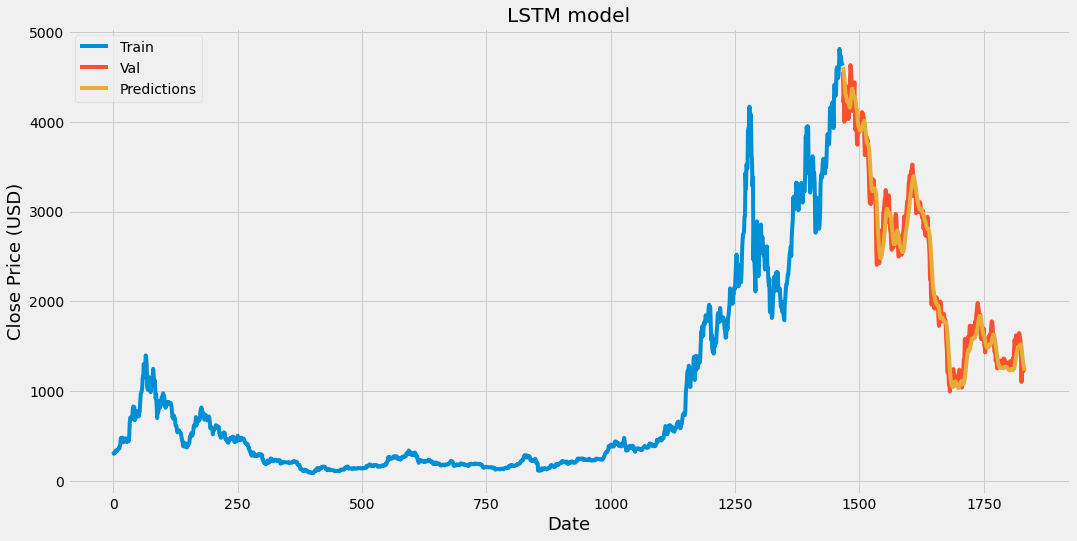

In [ ]:
#plot the data
#80% data as train data
train = data[:training_data_len]
#20% data as valid data
valid = data[training_data_len:]
valid['Predictions'] = predictions

#visualize the data
plt.figure(figsize=(16,8))
plt.title('LSTM model')
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Close Price (USD)', fontsize = 18)
plt.plot(train['Close'])


# plt.plot(valid[['Close', 'Predictions']])
plt.plot(valid['Close'])
print(valid)
plt.plot(valid['Predictions'])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
plt.show()
